In [1]:
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def oneMaxFitness(individual):
    return sum(individual), # кортеж


In [3]:
toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

def select(population, n_pop):
    return population

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
#toolbox.register("select", select)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)
stats.register("values", np.array)

population, logbook = algorithms.eaSimple(population, toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          verbose=False)

maxFitnessValues, meanFitnessValues, vals = logbook.select("max", "avg", "values")

In [ ]:
# как алгоритму удается найти решение задачи
# values - список приспособленностей на текущей итерации
# на каждой итерации

# кроссинговер работает хорошо
# скрещивание хромосом

# отбор плюс скрещивание работает лучше
# чем отбор и мутация

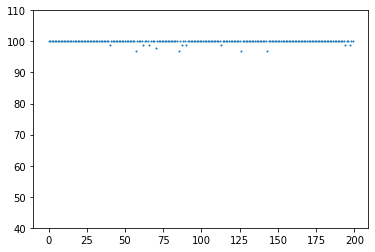

In [6]:
# plt.plot(maxFitnessValues, color='red')
# plt.plot(meanFitnessValues, color='green')
# plt.xlabel('Поколение')
# plt.ylabel('Макс/средняя приспособленность')
# plt.title('Зависимость максимальной и средней приспособленности от поколения')

plt.ion()
fig, ax = plt.subplots()

line, = ax.plot(vals[0], ' o', markersize=1)
ax.set_ylim(40, 110)

for v in vals:
    line.set_ydata(v)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.5)

plt.ioff()
plt.show()

In [ ]:
# анимация в пакете matplotlib